In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stat

Part a

In [2]:
N=2
D=3

In [5]:
def gen(Number,dimensions):
    start=np.zeros(dimensions)
    holder=np.zeros((2,dimensions))
    for i in range(0,Number):
        store=holder[-1]
        seed=int(time.time())
        for dim in range(0,dimensions):
            # np.random.seed(seed=seed)
            step=np.random.uniform(-0.5,0.5)
            store[dim]+=step
        holder=np.vstack((holder,store))
    return holder[0:-1]



10001


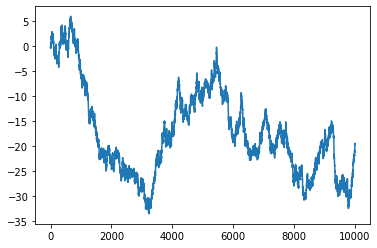

In [6]:
# Generate 10000 points in 1D
y=gen(10000,1)
print(y.size)
# plt.figure(figsize=(9,6),dpi=100)
plt.plot(y)

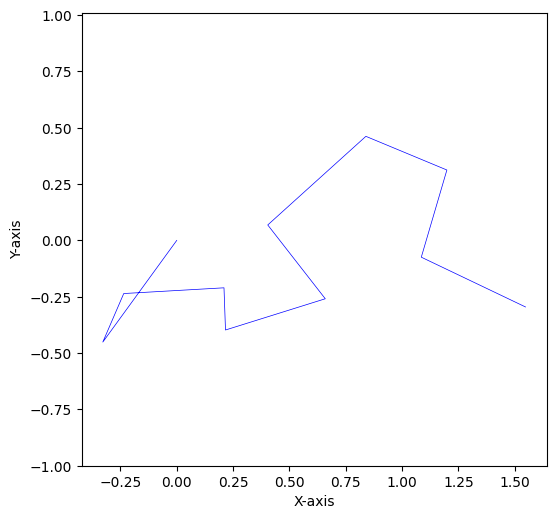

In [7]:
# Generate 10 points in 2D
y=gen(10,2)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

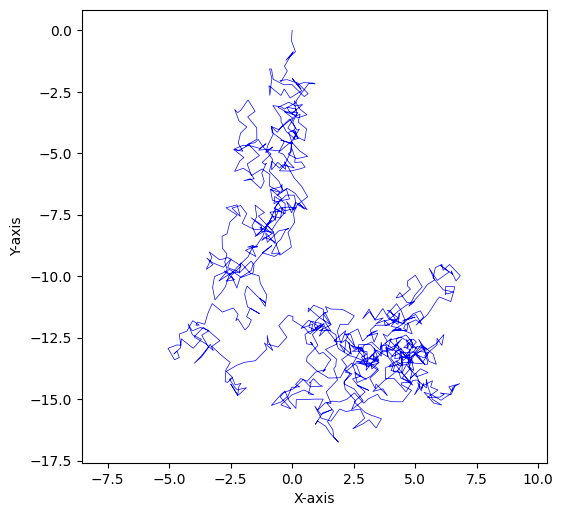

In [8]:
# Generate 10 points in 2D
y=gen(1000,2)
# print(y)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

In [10]:
# Generate 100000 points in 2D
y=gen(100000,2)
# print(y)
plt.figure(figsize=(9,9),dpi=1000)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

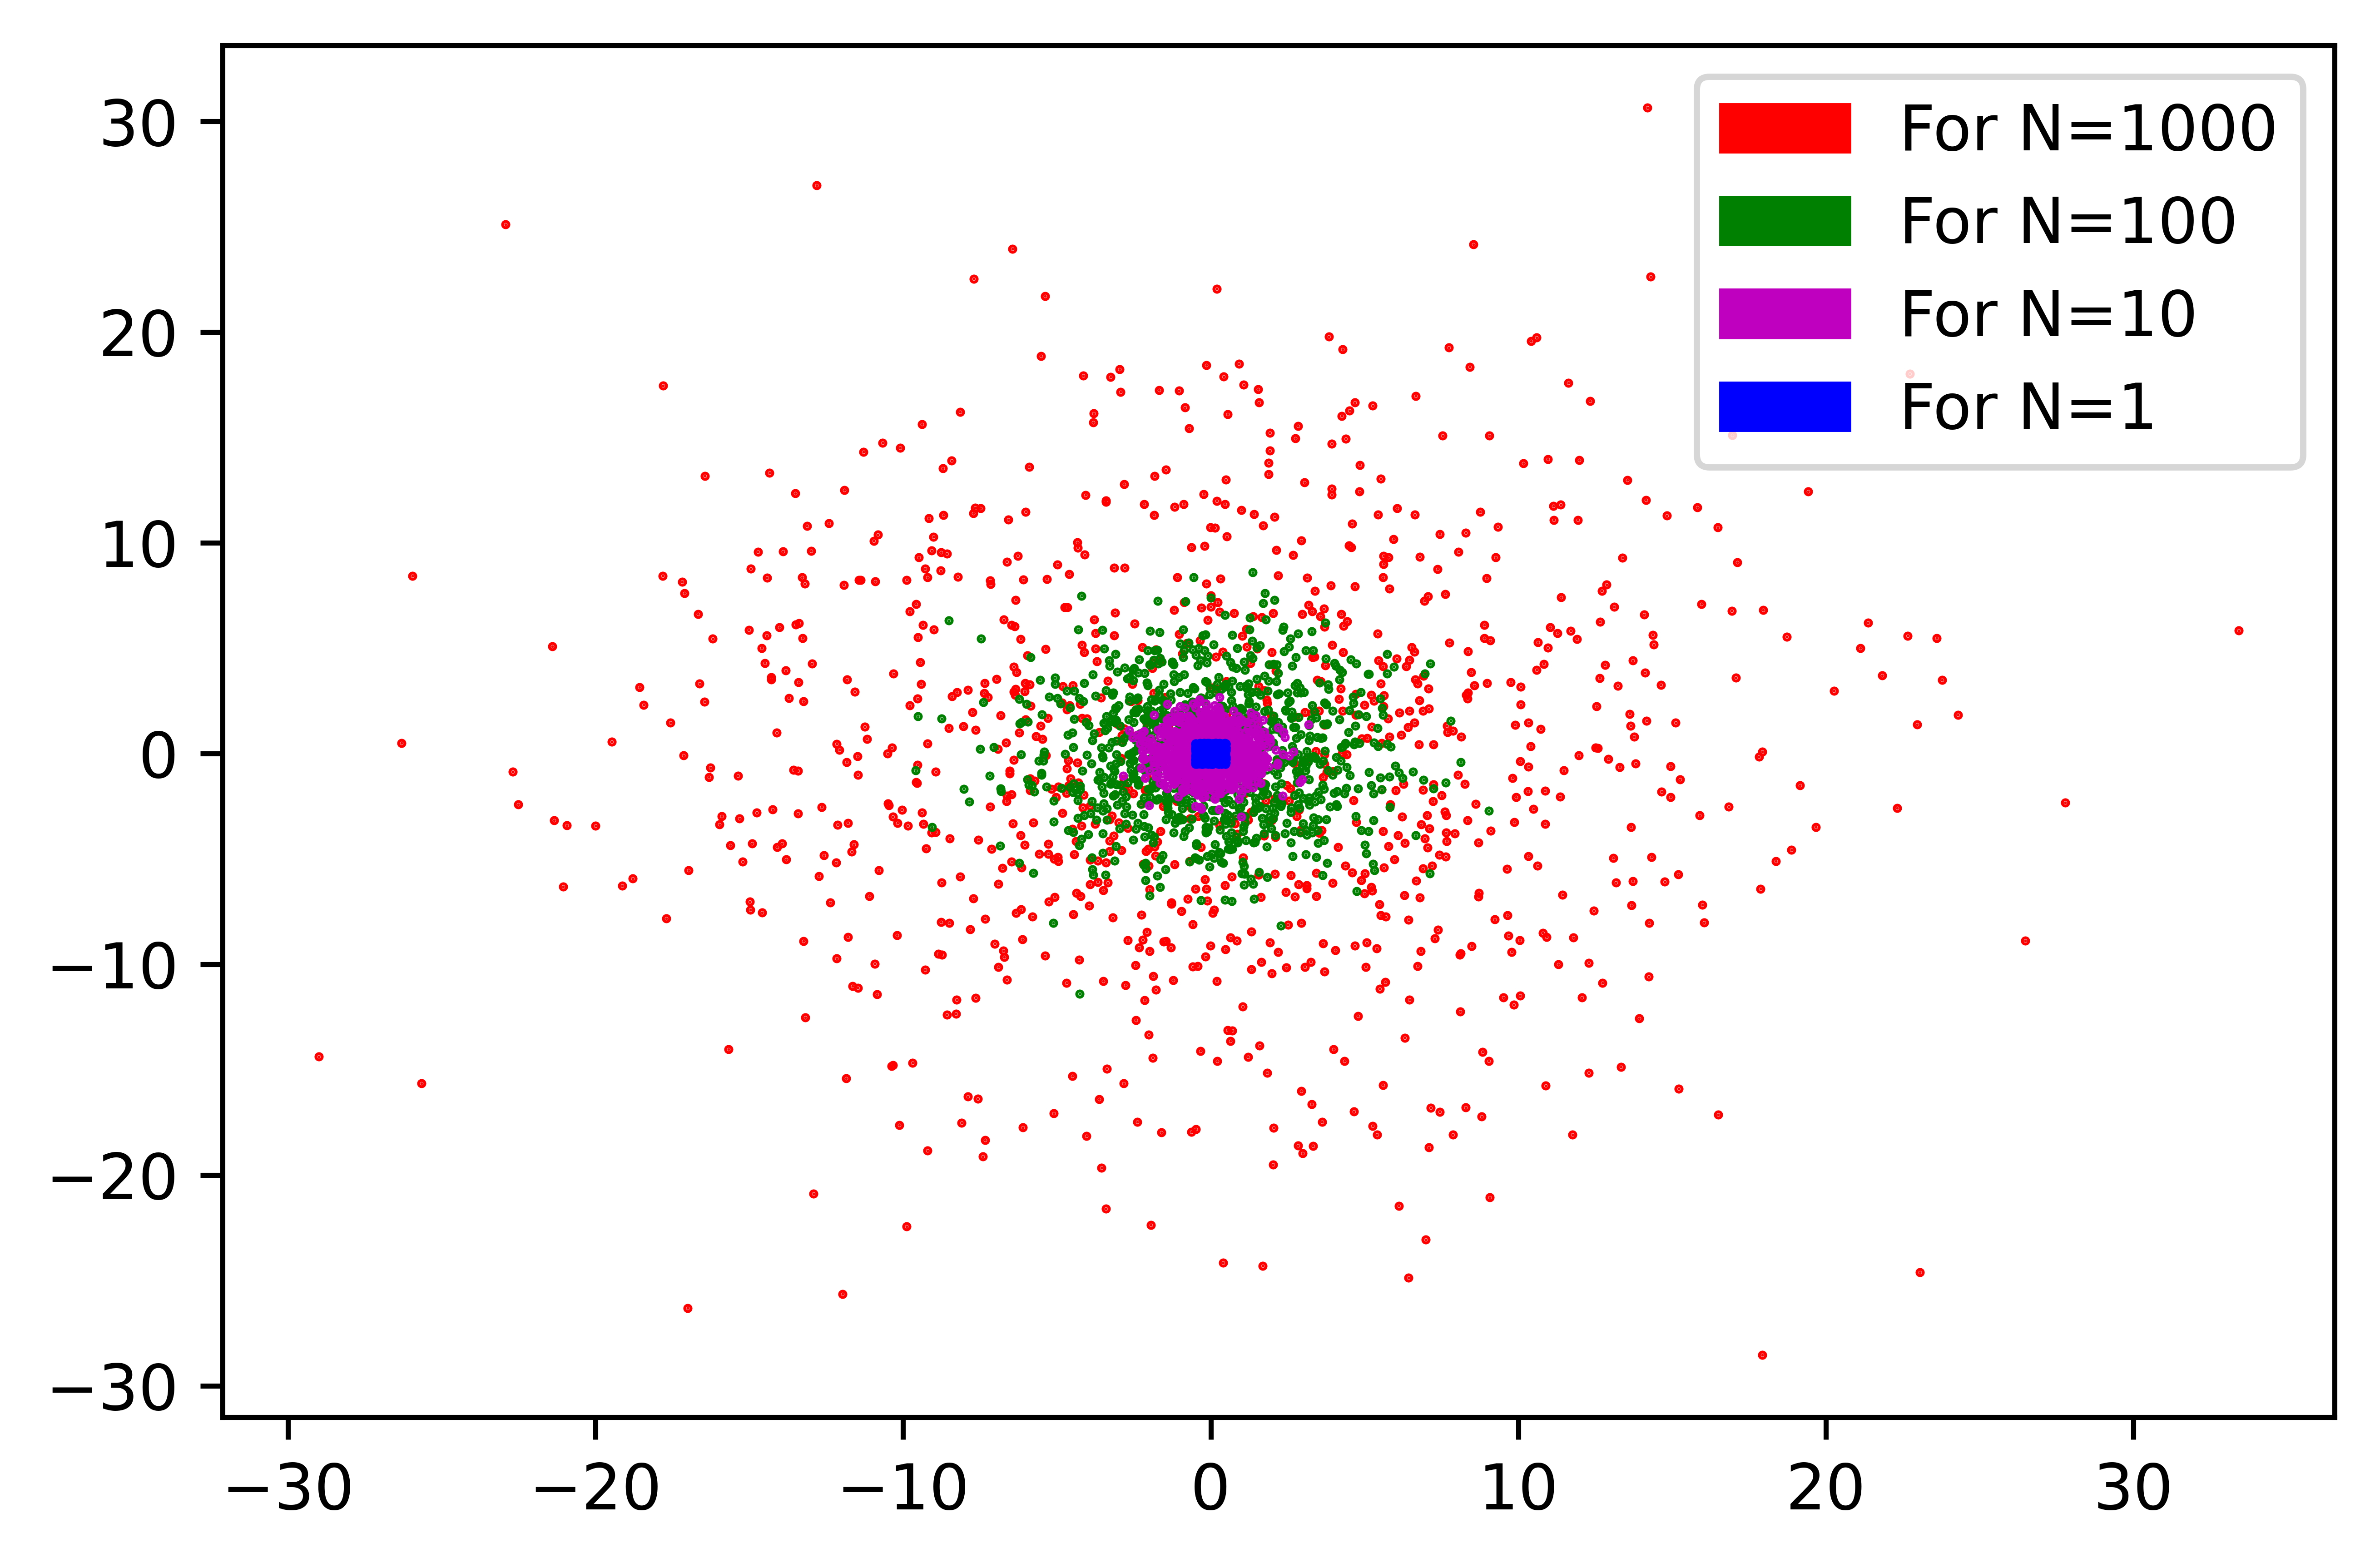

In [12]:
# Generates the end points cluster for various Number of steps
import matplotlib.patches as mpatches
handles=[]
plt.figure(dpi=1000)
for i in range(1000):
    z=gen(1000,2)
    plt.scatter(z[-1][0],z[-1][1],c='r',s=0.2)
handles.append(mpatches.Patch(color='r', label="For N=1000"))
for i in range(1000):
    z=gen(100,2)
    plt.scatter(z[-1][0],z[-1][1],c='g',s=0.2)
handles.append(mpatches.Patch(color='g', label="For N=100"))
for i in range(1000):
    z=gen(10,2)
    plt.scatter(z[-1][0],z[-1][1],c='m',s=0.2)
handles.append(mpatches.Patch(color='m', label="For N=10"))
for i in range(1000):
    z=gen(1,2)
    plt.scatter(z[-1][0],z[-1][1],c='b',s=0.2)
handles.append(mpatches.Patch(color='b', label="For N=1"))
plt.legend(handles=handles,loc="best")
plt.show()

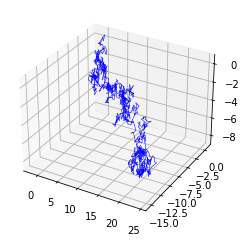

In [ ]:
# y=gen(1000,3)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# for i in range(len(y)-1):
#     plt.plot([y[i][0], y[i+1][0]], [y[i][1], y[i+1][1]],[y[i][2],y[i+1][2]], color='blue',linewidth=0.5)

In [13]:
# to confirm in case of random walk RMS value is nearly equal to standard deviation
q=gen(1,1)[-1]
sum=0
for i in range(100000):
    q=np.vstack((q,gen(1,1)[-1]))
for w in q:
    sum+=w**2
print(np.std(q))
print((sum/len(q))**0.5)

0.2889231660652995
[0.28892336]


In [14]:
def lastpt(walks,number_of_steps):
    endpoints=np.empty(9)
    for i in range(walks):#number of walks
        endpoints=np.hstack((endpoints,gen(number_of_steps,1)[-1]))
    endpoints=endpoints[1:]
    return endpoints


In [15]:
def plothist(Walks,N):
    list=lastpt(Walks,N)
    binsize=100
    sd=list.std()
    mean=list.mean()
    plt.figure(figsize=(9,6))
    x=np.linspace(mean-4*sd,mean+4*sd)
    plt.plot(x, 8*sd*Walks*stat.norm.pdf(x, loc=mean, scale=sd)/binsize,c='r')
    plt.hist(list,bins=binsize,range=(mean-4*sd,mean+4*sd))
    plt.title(" For N={}".format(N))
    handles=[]
    handles.append(mpatches.Patch(color='r', label="Normal distribution"))
    handles.append(mpatches.Patch(color='b', label="Frequency"))
    plt.legend(handles=handles,loc='best')
    # shapiro_stat, shapiro_p_value = stat.shapiro(list)
    print(stat.anderson(list,'norm'))
    # print(shapiro_p_value)
    # print(a,b,c)
    plt.show()

AndersonResult(statistic=112.19170014350675, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0011954925745433953, scale=0.29023819409944873)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


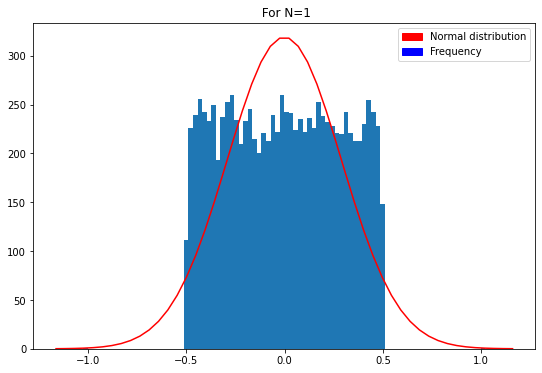

AndersonResult(statistic=792.6902027122323, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.008070824459897664, scale=0.8271944076264501)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


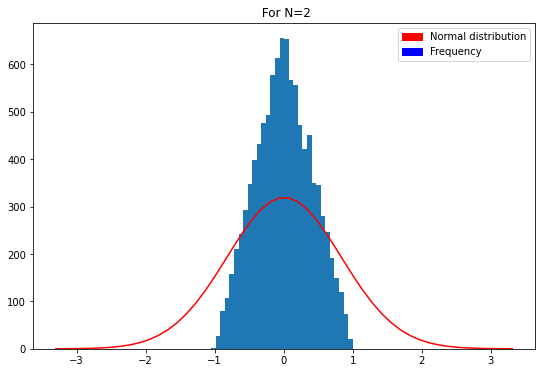

AndersonResult(statistic=1.5426766108685115, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.005820400736760827, scale=0.6529719535903639)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


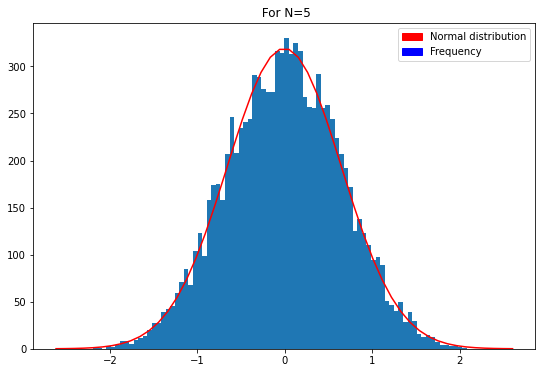

AndersonResult(statistic=0.5052444419707172, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.00888611799416696, scale=0.9190855413654587)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


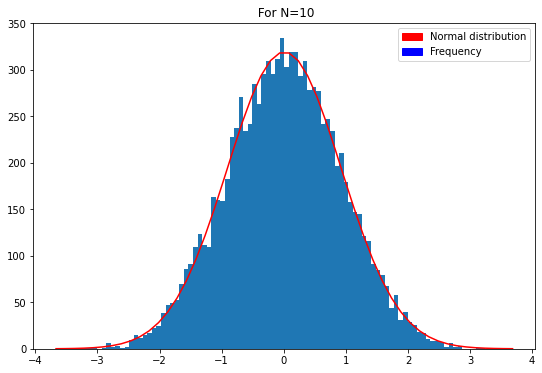

AndersonResult(statistic=0.489099956697828, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0004920070953109725, scale=1.299689326439235)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


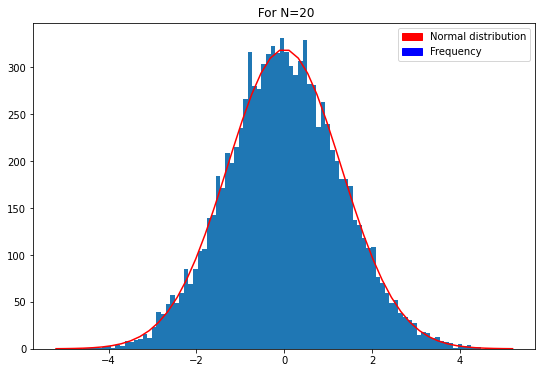

AndersonResult(statistic=0.3090092206020927, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.018556259466575575, scale=2.063105311319664)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


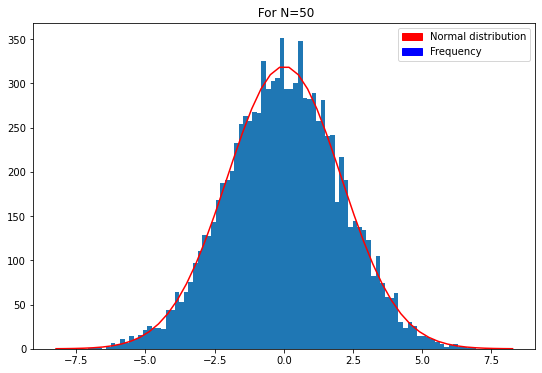

In [17]:
# Histogram plotting and Lower the anderson statistic better it follows a normal distribution 
plothist(10000,1)
plothist(10000,2)
plothist(10000,5)
plothist(10000,10)
plothist(10000,20)
plothist(10000,50)